# Execute a multiple linear regression (MLR) for BME680 gas readings of a single sensor

Read the CSV file created by the CCU Historian, ensure that field separator is ';' and decimal separator is '.', if necessary edit CSV file before reading it by the provided script 'csv_convert_historian.bsh'<br/>
The provided script 'get_new_history.bsh' is searching for the CCU Historian's CSV in the directory '${HOME}/Downloads'. The conversion script 'csv_convert_historian.bsh' is invoked as part of 'csv_convert_historian.bsh'<br/>
<br/>
<br/>
Important note: The below calculated multlinear regression coefficients do not fit for the sensor 'HB-UNI-Sensor1-AQ-BME680'! The sensor 'HB-UNI-Sensor1-AQ-BME680' is requiring regression parameters for temperature and absolute humidity aH, while this regression is for temperature and relative humidity rH.
<br/>
<br/>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from datetime import datetime

import numpy as np


dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S,%f')
  
df0 = pd.read_csv("historian.csv", sep=';', thousands=".", decimal=",", skiprows = [0,1,2],dtype={'High': np.float64, 'Low': np.float64}, header = None, encoding= 'unicode_escape',  parse_dates=[0], date_parser=dateparse, names = [ 'Datum', 'Mode', 'raw_gas_resistance', 'relative_humidity', 'temperature'])

df0.head(9)
#df['Datum']
#type(df['sensor 1'][0])

,Datum,Mode,raw_gas_resistance,relative_humidity,temperature
0,2021-01-15 19:00:00.000,2,177160,28.9,24.6
1,2021-01-15 19:00:56.674,2,177160,28.9,24.6
2,2021-01-15 19:00:56.683,2,177160,29.6,24.6
3,2021-01-15 19:00:56.688,2,174900,29.6,24.6
4,2021-01-15 19:05:29.488,2,174900,29.6,24.6
5,2021-01-15 19:05:29.498,2,174900,30.1,24.6
6,2021-01-15 19:05:29.504,2,175280,30.1,24.6
7,2021-01-15 19:10:02.302,2,175280,30.1,24.6
8,2021-01-15 19:10:02.306,2,175280,29.7,24.6


In [2]:
# keep every 3rd row (CCU historian is tracking every change of a datapoint separately)
# each three consecutive entries in history.csv are identical; therefore we take every third entry only 
df = df0[(df0.index % 3 == 0)]

df.head(9)

,Datum,Mode,raw_gas_resistance,relative_humidity,temperature
0,2021-01-15 19:00:00.000,2,177160,28.9,24.6
3,2021-01-15 19:00:56.688,2,174900,29.6,24.6
6,2021-01-15 19:05:29.504,2,175280,30.1,24.6
9,2021-01-15 19:10:02.312,2,175860,29.7,24.6
12,2021-01-15 19:14:35.120,2,173780,29.9,24.6
15,2021-01-15 19:19:07.932,2,170320,30.3,24.6
18,2021-01-15 19:23:40.751,2,167060,30.7,24.6
21,2021-01-15 19:28:13.551,2,164920,30.9,24.6
24,2021-01-15 19:32:46.361,2,161640,31.2,24.7


Time series diagram of the measured raw gas resistance

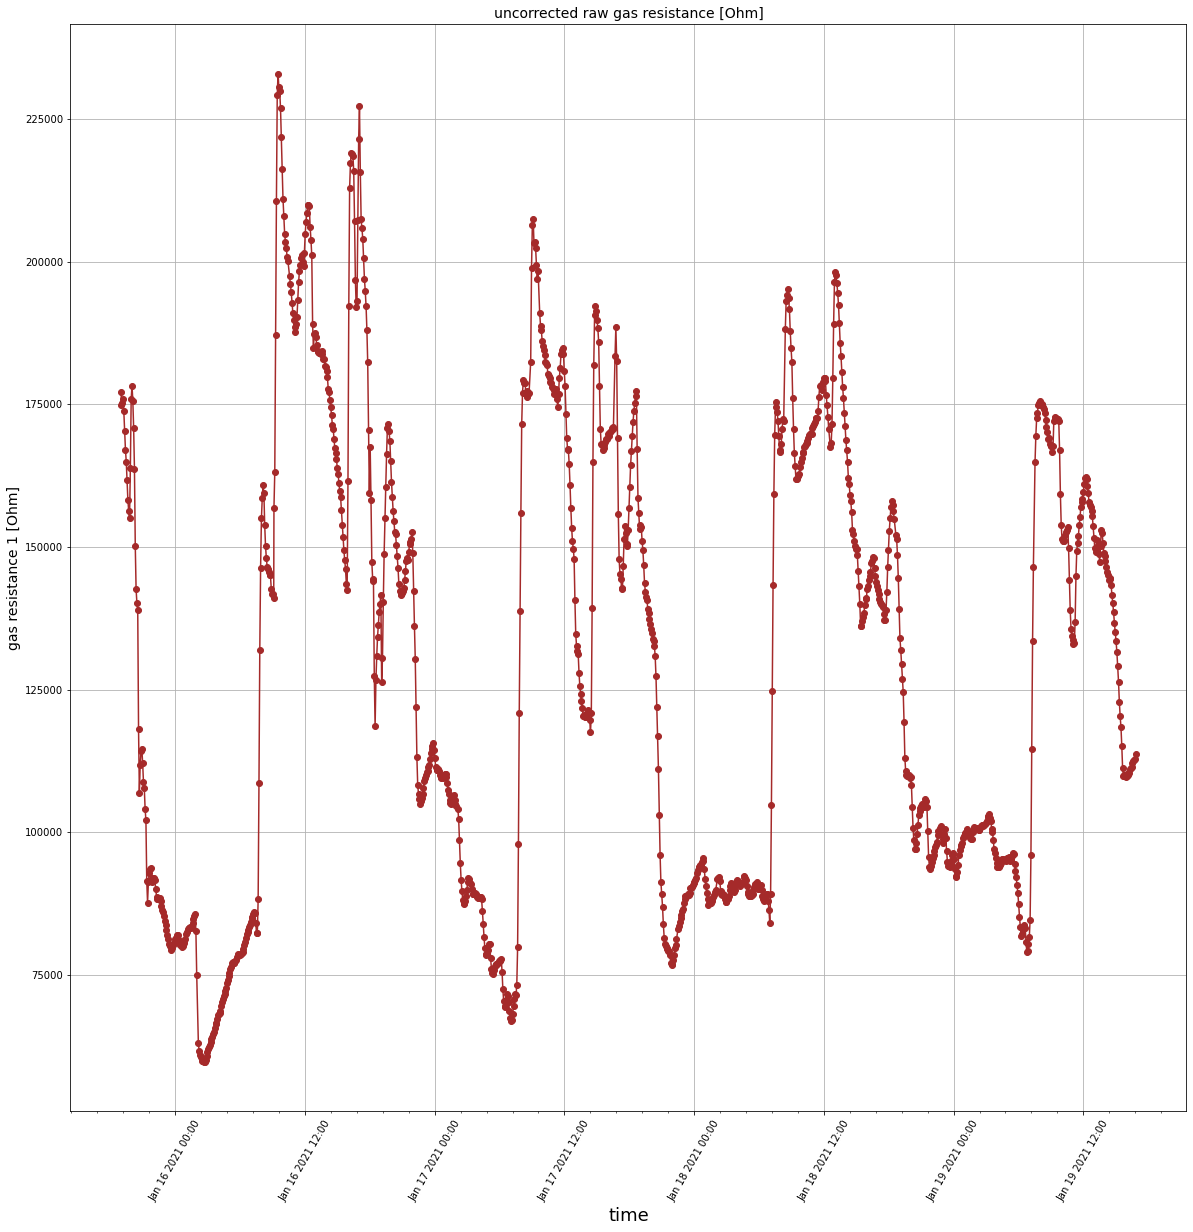

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.plot_date(df['Datum'], df['raw_gas_resistance'], linestyle='solid', color='brown')         
plt.title('uncorrected raw gas resistance [Ohm]', fontsize=14)
plt.xlabel('time', fontsize=18)
plt.ylabel('gas resistance 1 [Ohm]', fontsize=14)
plt.grid(True)
plt.show()

Time series diagram of the measured temperature 

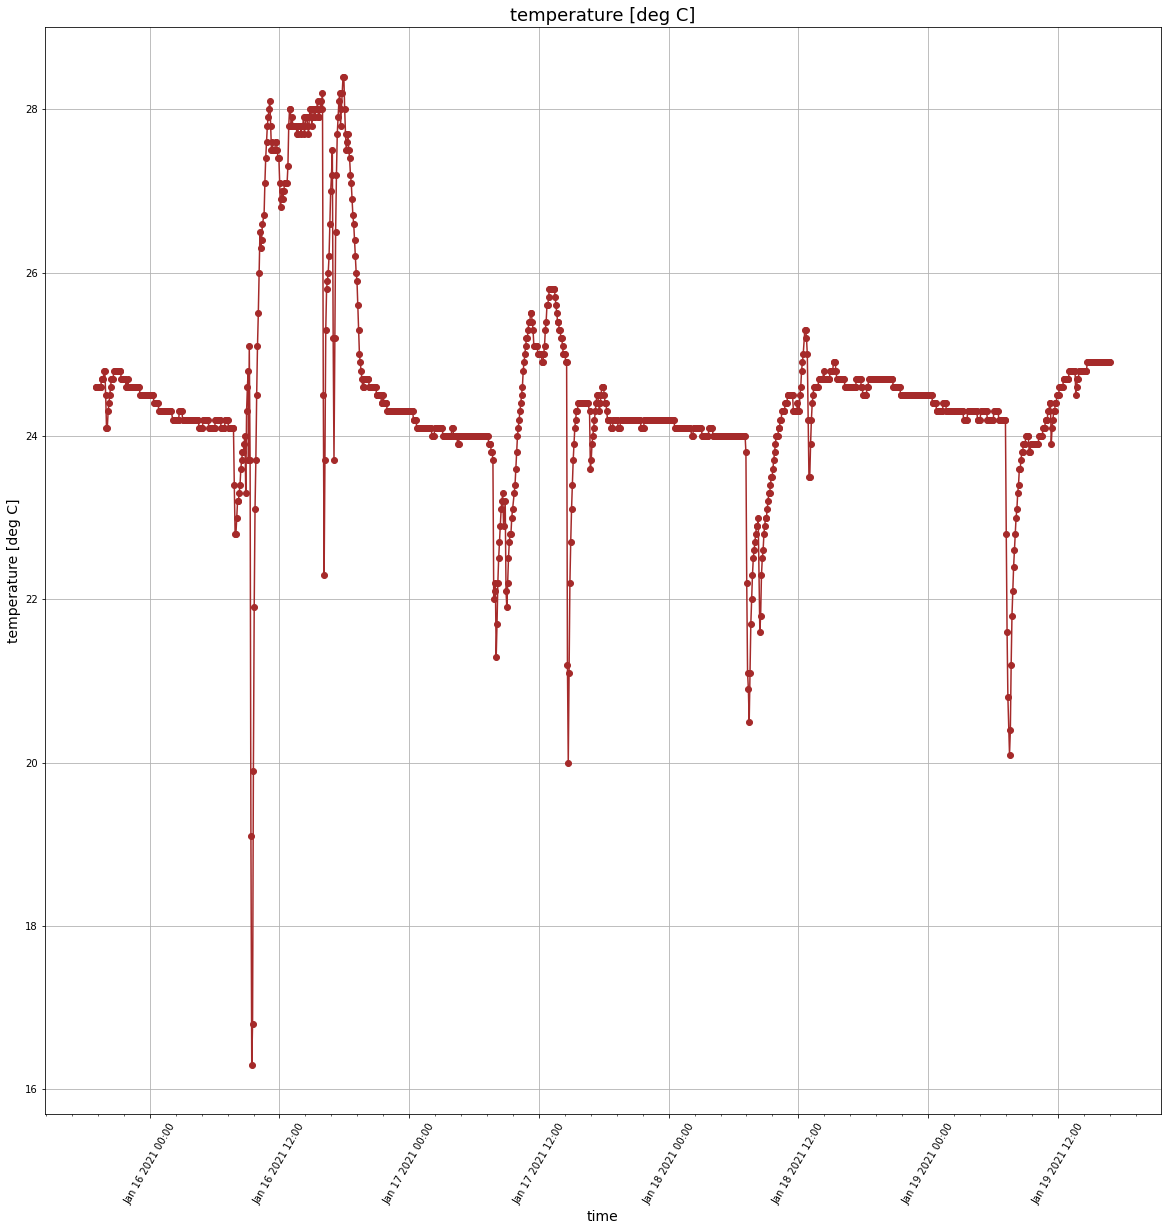

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.plot_date(df['Datum'], df['temperature'], linestyle='solid', color='brown')         
plt.title('temperature [deg C]', fontsize=18)
plt.xlabel('time', fontsize=14)
plt.ylabel('temperature [deg C]', fontsize=14)
plt.grid(True)
plt.show()

Time series diagram of the measured relative humidity 

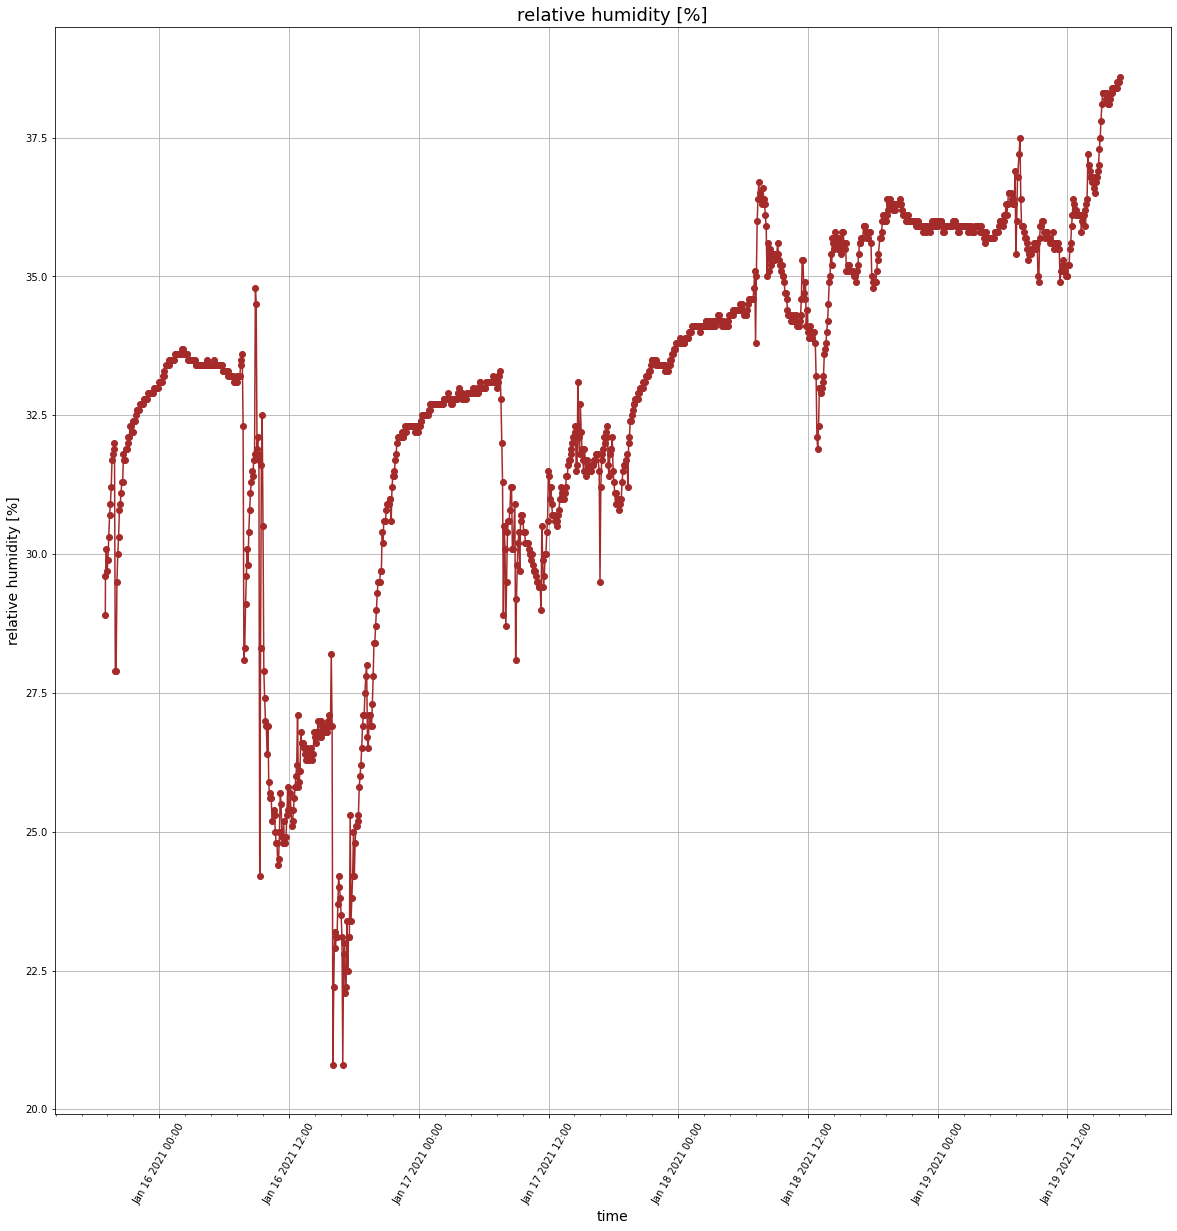

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.plot_date(df['Datum'], df['relative_humidity'], linestyle='solid', color='brown')         
plt.title('relative humidity [%]', fontsize=18)
plt.xlabel('time', fontsize=14)
plt.ylabel('relative humidity [%]', fontsize=14)
plt.grid(True)
plt.show()

Scatter plot of raw gas resistance versus the relative humidity, is the dependency somehow linear (should be for a multilinear regression)?

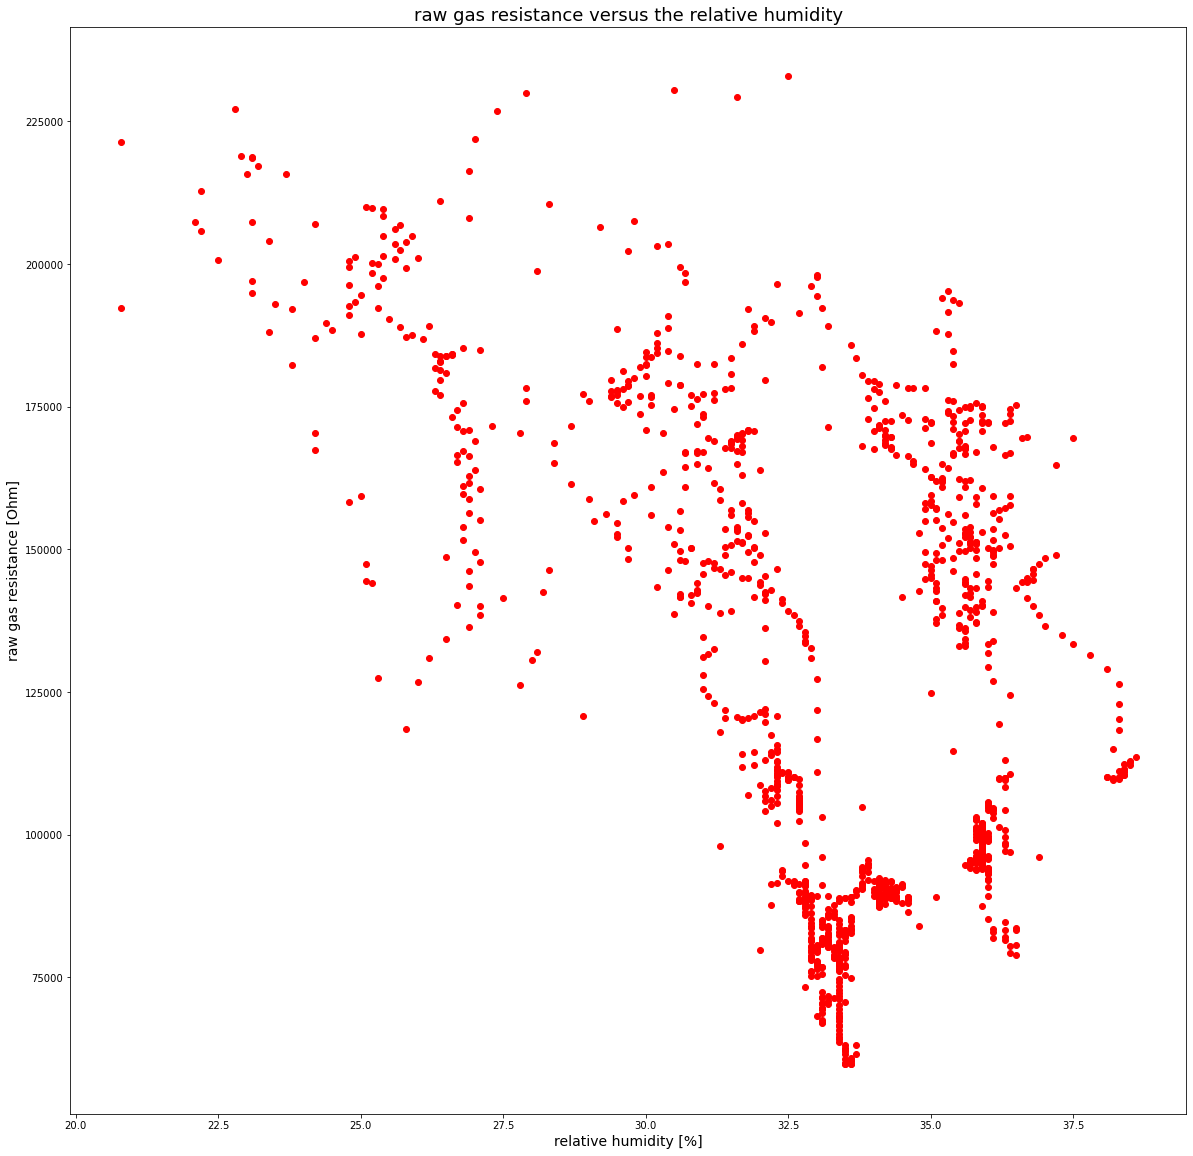

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(20,20))

plt.scatter(df['relative_humidity'], df['raw_gas_resistance'], color='red')
plt.title('raw gas resistance versus the relative humidity', fontsize=18)
plt.xlabel('relative humidity [%]', fontsize=14)
plt.ylabel('raw gas resistance [Ohm]', fontsize=14)
plt.show()

Scatter plot of raw gas resistance versus the temperature, is the dependency somehow linear (should be for a multilinear regression)?

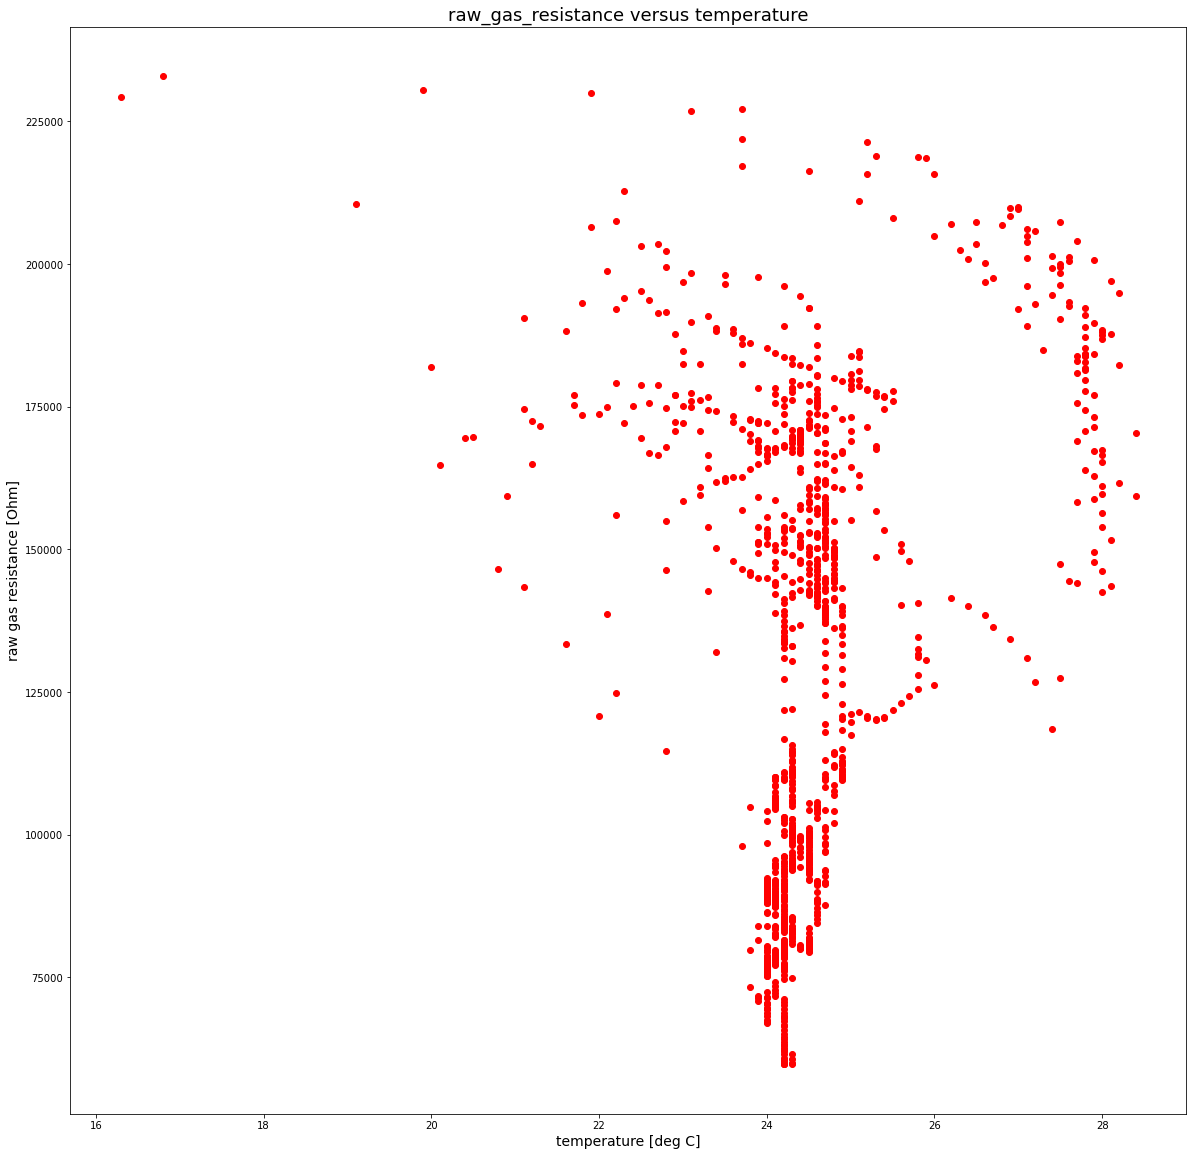

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(20,20))
plt.scatter(df['temperature'], df['raw_gas_resistance'], color='red')
plt.title('raw_gas_resistance versus temperature', fontsize=18)
plt.xlabel('temperature [deg C]', fontsize=14)
plt.ylabel('raw gas resistance [Ohm]', fontsize=14)
plt.grid(False)
plt.show()

Execute a multiple linear regression of raw gas resistance oin dependency of the relative humidity and the temperature<br/>
use the prediction 'predictions1' of the mutiple linear regression to create a corrected gas resistance 'residuals' with eliminated influence of the relative humidity and the temperature<br/>
create a normalized scaled corrected gas resistance 'normalized_residuals'

Intercept: 
 441752.56271364645
Coefficients: 
 [-3580.07022682 -6835.83257652]
                            OLS Regression Results                            
Dep. Variable:     raw_gas_resistance   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.82e-73
Time:                        11:39:30   Log-Likelihood:                -14600.
No. Observations:                1226   AIC:                         2.921e+04
Df Residuals:                    1223   BIC:                         2.922e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

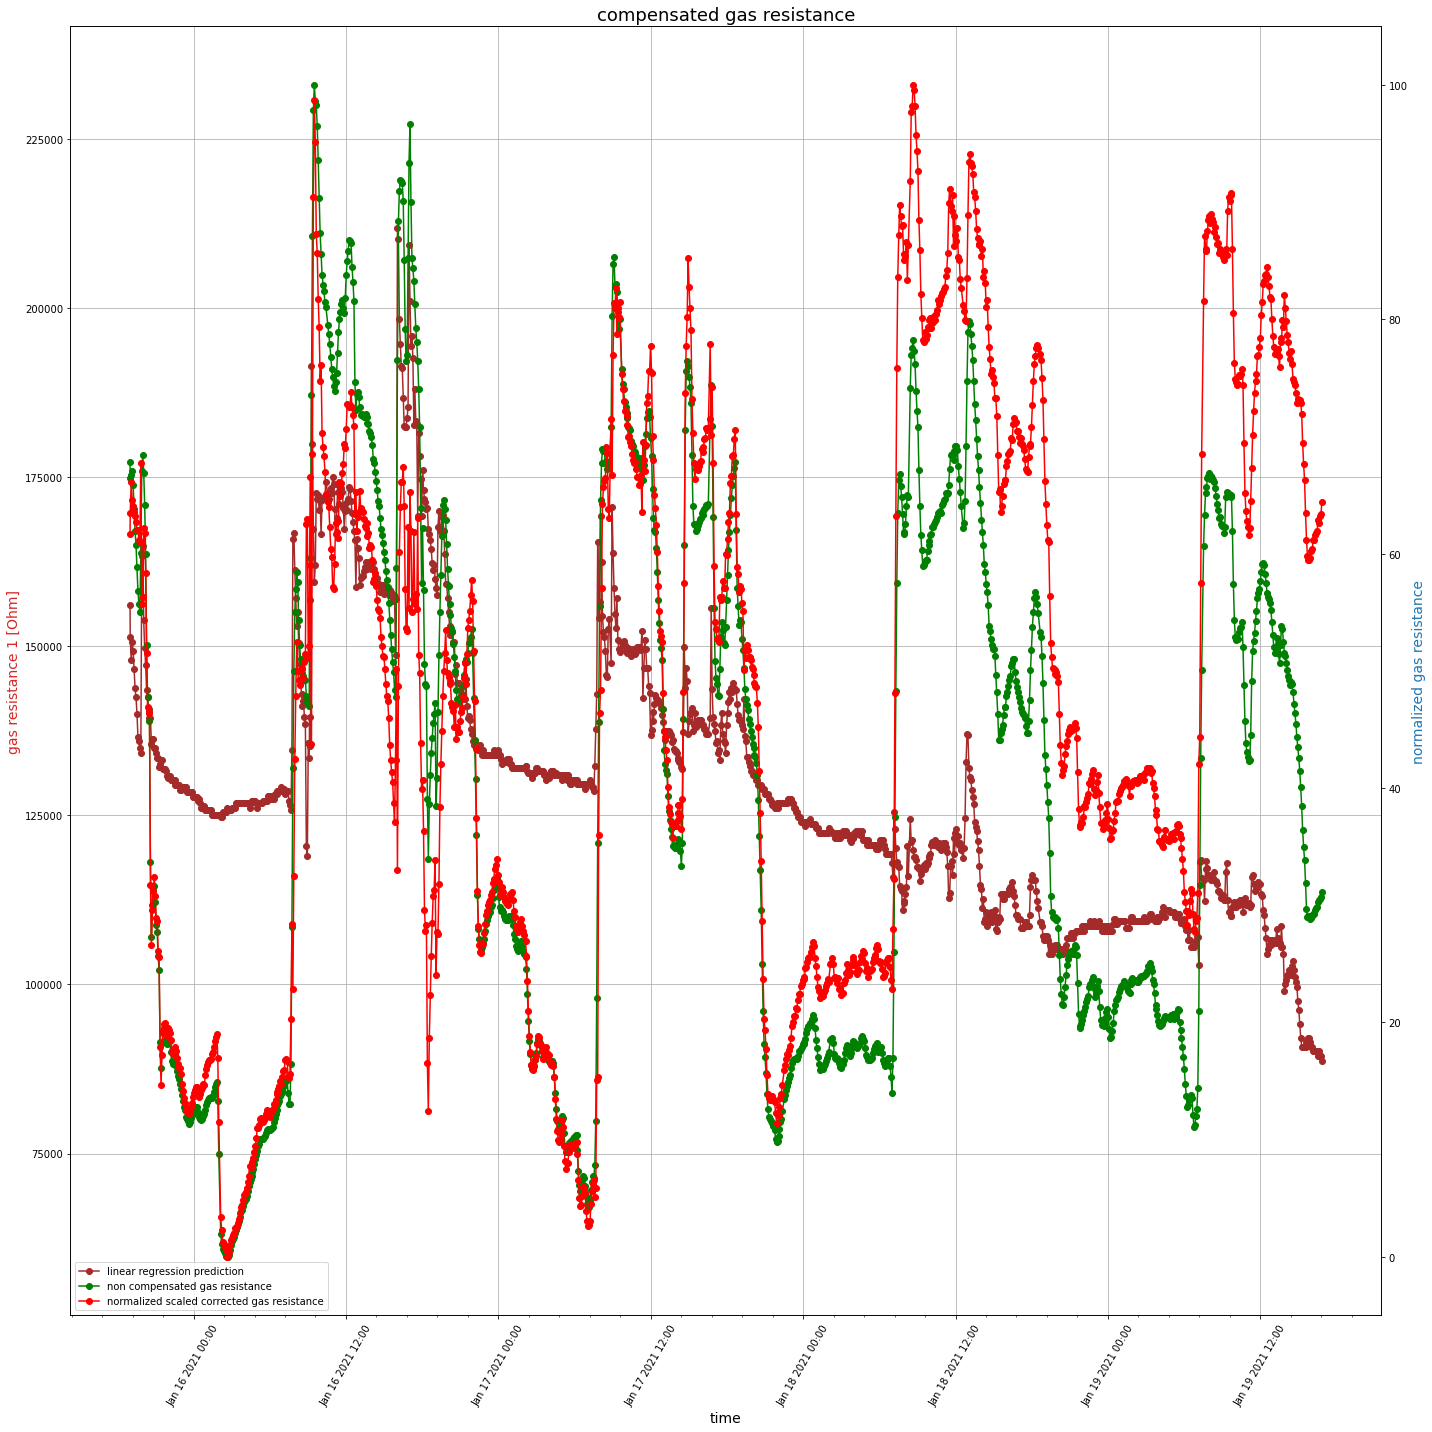

In [8]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


X = df[['temperature','relative_humidity']] # here we have 2 variables for multiple regression
Y = df['raw_gas_resistance']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print(model.rsquared)

print(len(X))

residuals=df['raw_gas_resistance']-predictions
min_res=min(residuals)
max_res=max(residuals)

#clip min of residual to epsilon in order to avoid a log(0) trap
epsilon=0.0001

normalized_residuals=((residuals-min_res)/(max_res-min_res)).clip(epsilon,None)*100


fig, ax1 = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax1.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax1.xaxis.set_minor_locator(AutoMinorLocator())

lns1=ax1.plot_date(df['Datum'], predictions, linestyle='solid', color='brown', label='linear regression prediction')
lns2=ax1.plot_date(df['Datum'], df['raw_gas_resistance'], linestyle='solid', color='green', label='non compensated gas resistance')
color = 'tab:red'
ax1.set_xlabel('time', fontsize=14)
ax1.set_ylabel('gas resistance 1 [Ohm]', color=color, fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax2.xaxis.set_minor_locator(AutoMinorLocator())

color = 'tab:blue'
ax2.set_ylabel('normalized gas resistance', color=color, fontsize=14)  # we already handled the x-label with ax1
lns3=ax2.plot_date(df['Datum'], normalized_residuals, linestyle='solid', color='red', label='normalized scaled corrected gas resistance')

plt.title('compensated gas resistance', fontsize=18)

ax1.grid(True)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


time series diagrams of normalized scaled gas resistance; y range is 0.0..100.0 [%]

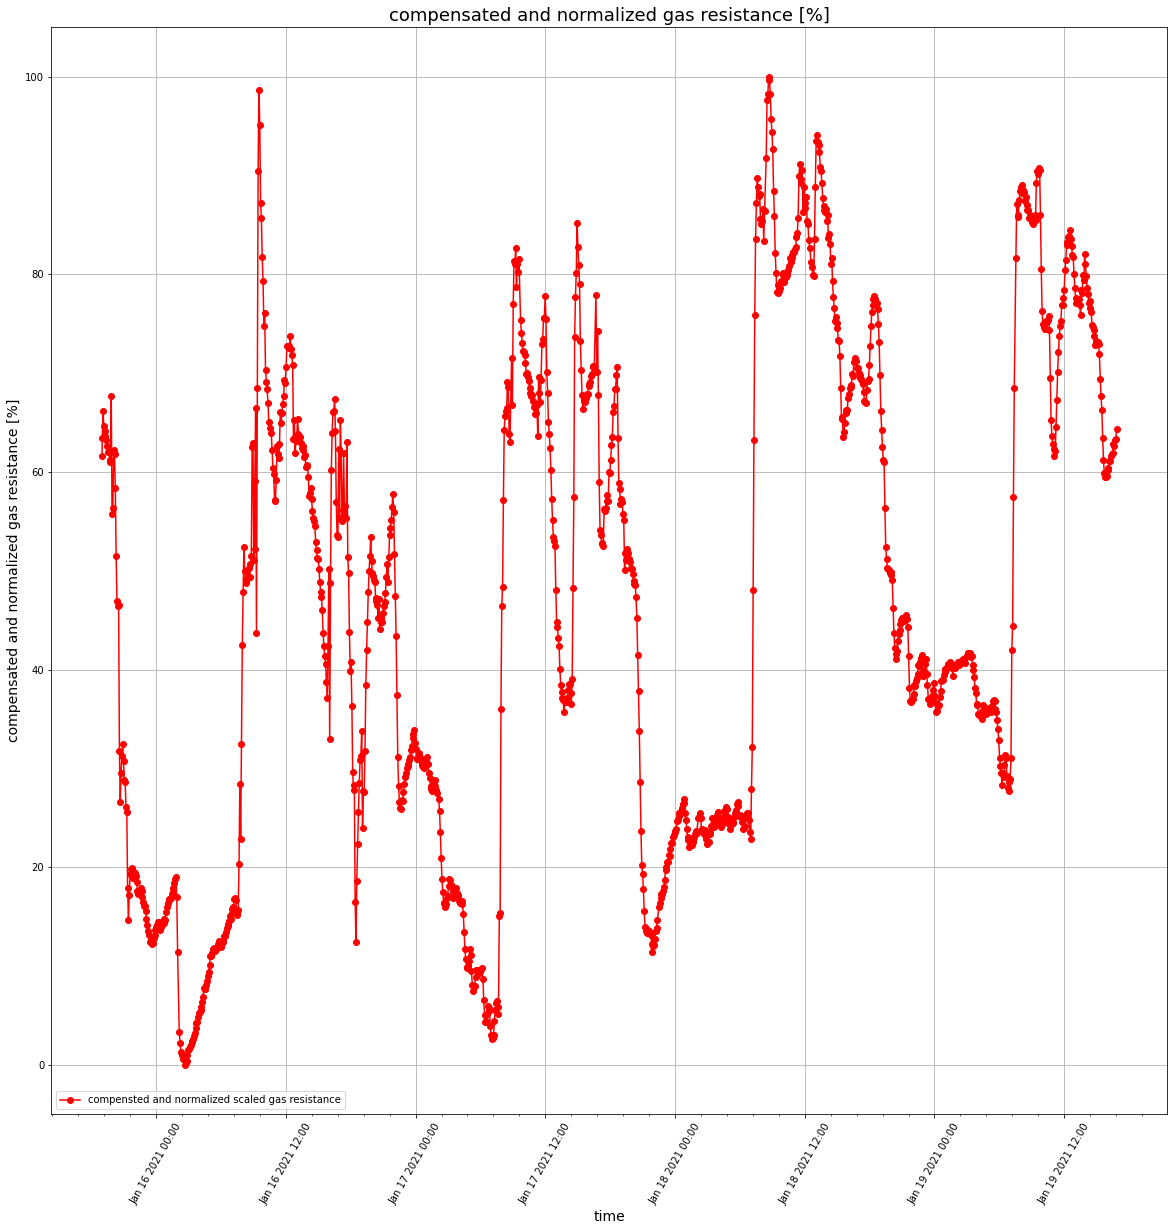

In [9]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))

ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.plot_date(df['Datum'], normalized_residuals, linestyle='solid', color='red', label='compensted and normalized scaled gas resistance')

plt.title('compensated and normalized gas resistance [%]', fontsize=18)
plt.xlabel('time', fontsize=14)
plt.ylabel('compensated and normalized gas resistance [%]', fontsize=14)
plt.grid(True)
plt.legend(loc ="lower left")
plt.show()

time series diagrams of compensated and normalized scaled gas resistance with logarithmic y scale 0.01 .. 100

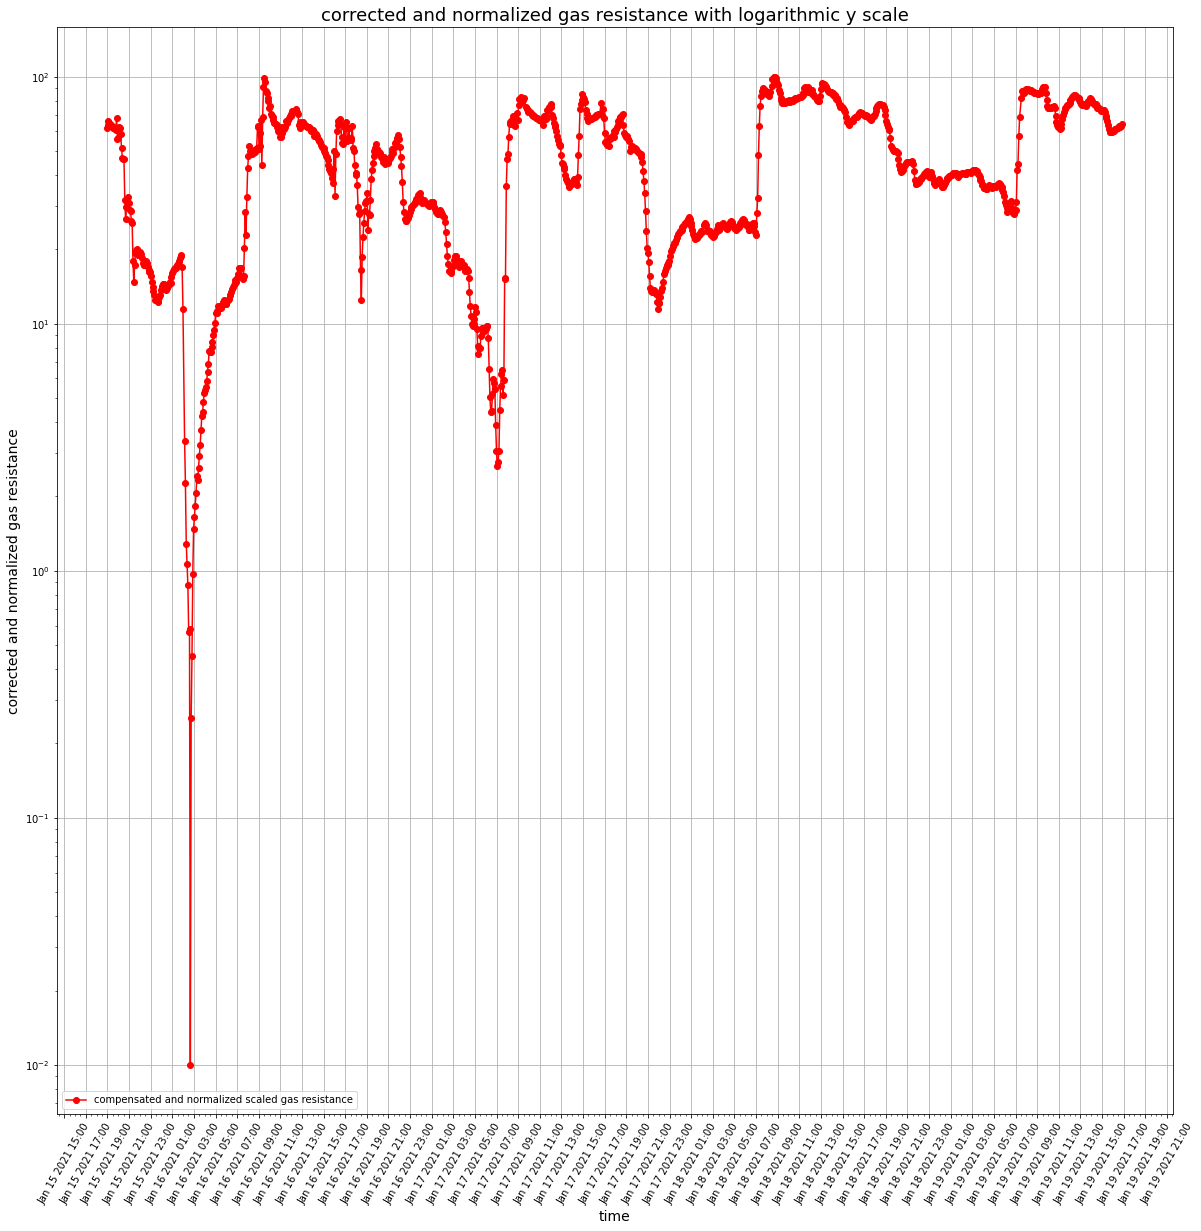

In [10]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


fig, ax = plt.subplots(figsize=(20, 20))
plt.yscale('log')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], normalized_residuals, linestyle='solid', color='red', label='compensated and normalized scaled gas resistance')

plt.title('corrected and normalized gas resistance with logarithmic y scale', fontsize=18)
plt.xlabel('time', fontsize=14)
plt.ylabel('corrected and normalized gas resistance', fontsize=14)
plt.grid(True)
plt.legend(loc ="lower left")
plt.show()

time series diagrams of the logarithmic air quality level
the air quality level can vary between 0.0 (fresh air) and 4.0 (very poor air quality)

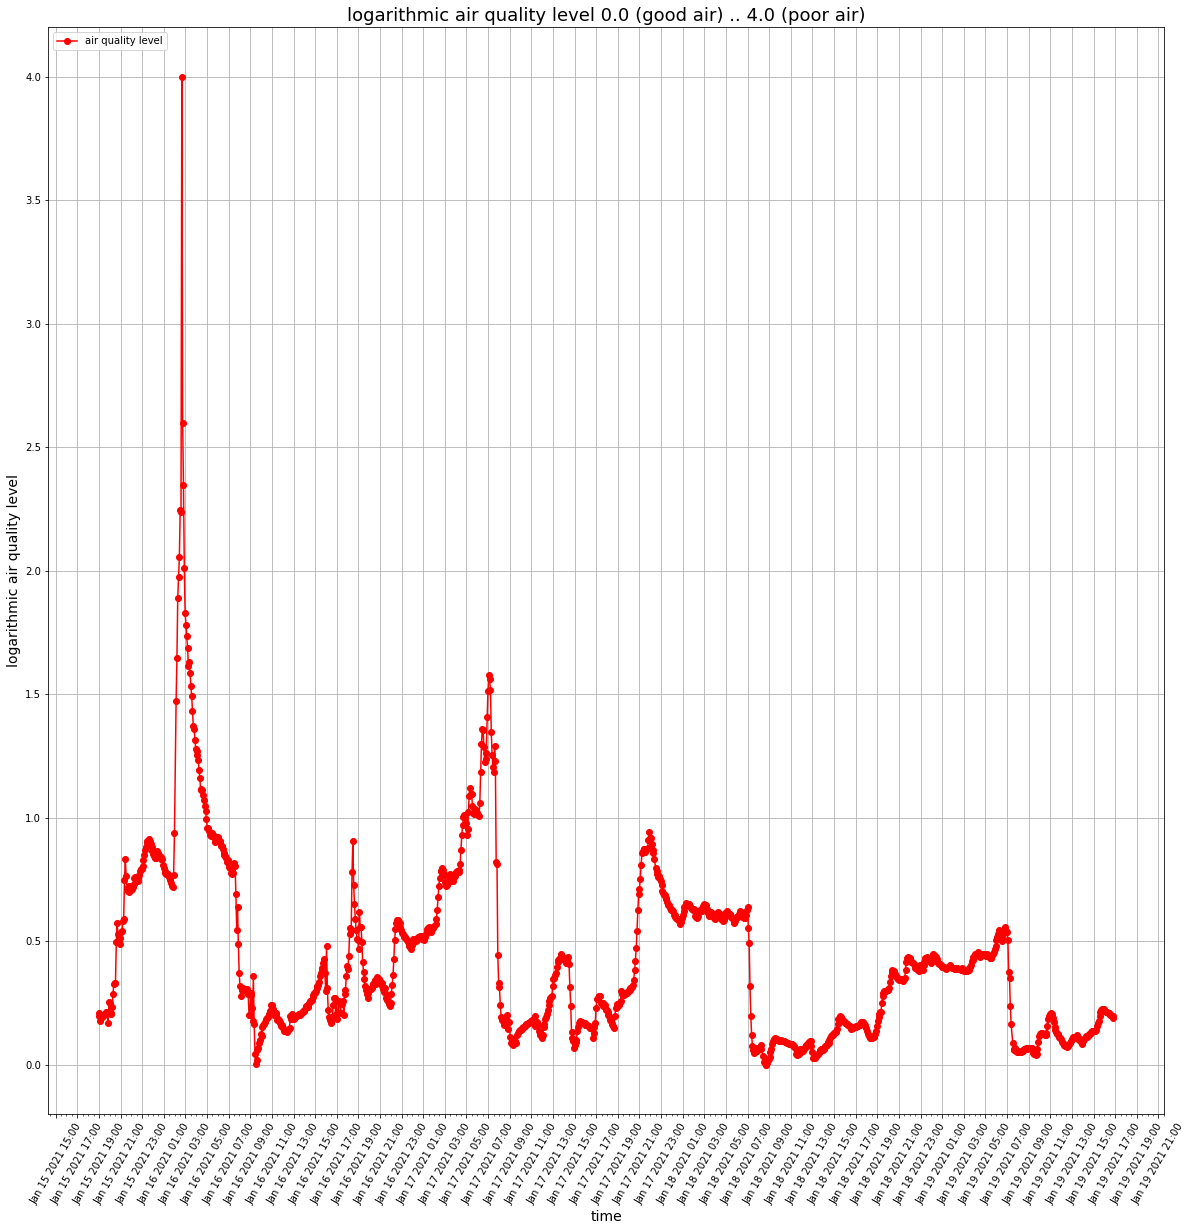

In [11]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

log_normalized_residuals = -(np.log10(normalized_residuals)-2)


fig, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(DateFormatter('%b %d %Y %H:%M'))
hours = mdates.HourLocator(interval = 2)  
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_minor_locator(AutoMinorLocator())


plt.xticks(rotation=60)
plt.plot_date(df['Datum'], log_normalized_residuals, linestyle='solid', color='red', label='air quality level')

plt.title('logarithmic air quality level 0.0 (good air) .. 4.0 (poor air)', fontsize=18)
plt.xlabel('time', fontsize=14)
plt.ylabel('logarithmic air quality level', fontsize=14)
plt.grid(True)
plt.legend(loc ="upper left")
plt.show()

Please check whether the R-squared (uncentered) of the multiple linear regression above is sufficiently good (should be > 0.7):
R-squared (also called coefficient of determination) is the portion of variance in the dependent variables that can be explained by the independent variables. Hence, as a rule of thumb for interpreting the strength of a relationship based on its R-squared value is:
- if R-squared value < 0.3 this value is generally considered as None or very weak effect size
- if R-squared value 0.3 < r < 0.5 this value is generally considered as weak or low effect size
- if R-squared value 0.5 < r < 0.7 this value is generally considered as moderate effect size
- if R-squared value 0.7 < r < 1.0 this value is generally considered as strong effect size

If R-squared value is < 0.3, the collected history may be too short. Please try to collect datapoints for a longer timeframe!

In [12]:
print("\n\nR-squared (uncentered) of the multiple linear regression       = %11.2lf\n\n" % model.rsquared)



R-squared (uncentered) of the multiple linear regression       =        0.24




Important note: Please do not use the calculated coefficients for the sensor ''HB-UNI-Sensor1-AQ-BME680' since the won't fit, see remark at  the top.

Please enter the following parameters of the multilinear regression into the Homematic/RaspberryMatic WebUI page<br/>
'Startseite > Einstellungen > Geräte > Geräte-/ Kanalparameter einstellen' of your concerning BME680 AQ sensor device<br/>
which was the source of the history.csv file above

In [13]:
print("\nNumber of captured data points used for the MLR                     = %11d" % len(X))

print("\nPlease enter the WebUI device parameter 'WEATHER|mlr_alpha'         = %11.3lf" % regr.coef_[0])
print("Please enter the WebUI device parameter 'WEATHER|mlr_beta'          = %11.3lf" % regr.coef_[1])
print("Please enter the WebUI device parameter 'WEATHER|mlr_delta'         = %11.3lf" % regr.intercept_)

import datetime
now = datetime.datetime.now()
print("\n\nPlease check whether current date and time are correct: ")
print(str(now))



Number of captured data points used for the MLR                     =        1226

Please enter the WebUI device parameter 'WEATHER|mlr_alpha'         =   -3580.070
Please enter the WebUI device parameter 'WEATHER|mlr_beta'          =   -6835.833
Please enter the WebUI device parameter 'WEATHER|mlr_delta'         =  441752.563


Please check whether current date and time are correct: 
2023-06-04 11:39:32.870588


Congratulations, you are done! <br/>

Please repeat the multilinear regression update of the WebUI device parameters on a regular basis every month or similar as appropriate ..